### IDs:
Insert yours IDs to the cell below

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load `Diabetes` dataset from sklearn.
Explore the data. Follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of all the features.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [3]:
import pandas as pd
import numpy as np

# load `Diabetes` dataset from sklearn.
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)


In [6]:
# 1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?

print(df.head())
print(df.describe())

# print the data type for each column
print(df.dtypes)

print(f'Number of sumples: {df.shape[0]}, Number of features: {df.shape[1]}, Data type for each variable: {df.dtypes}')


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164

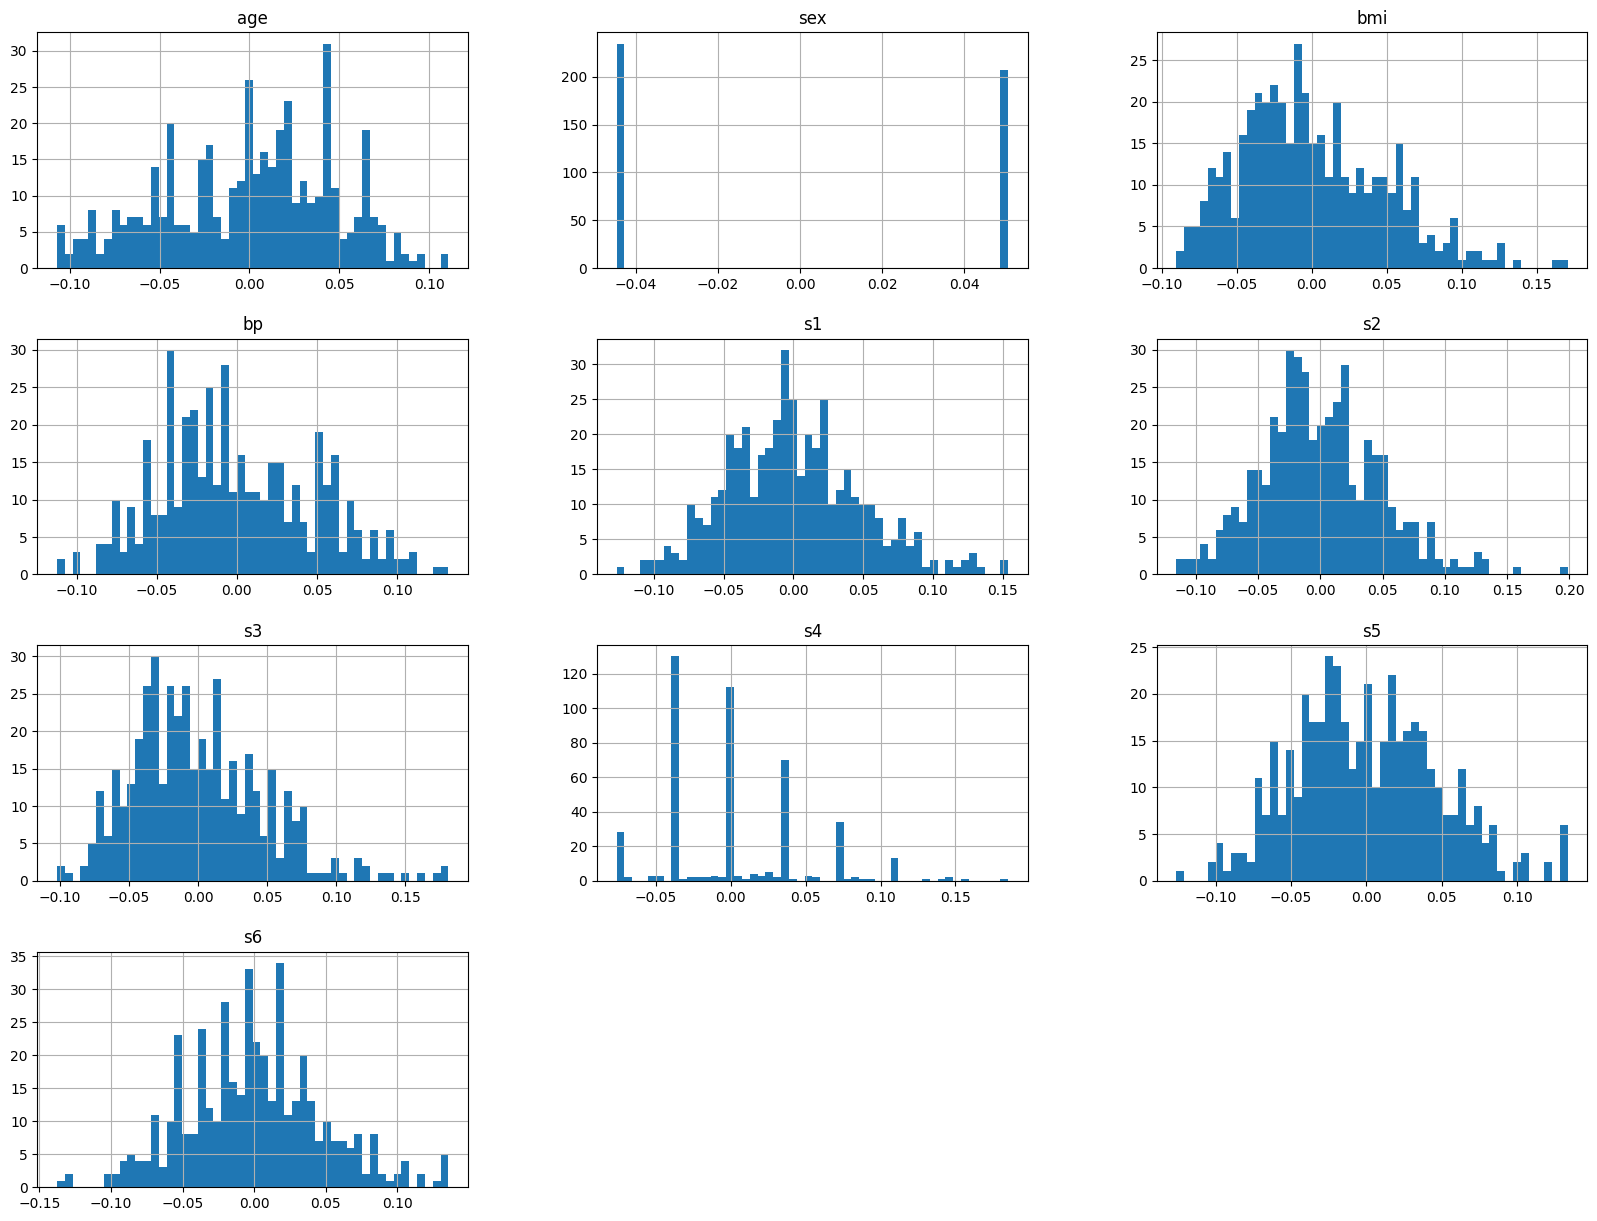

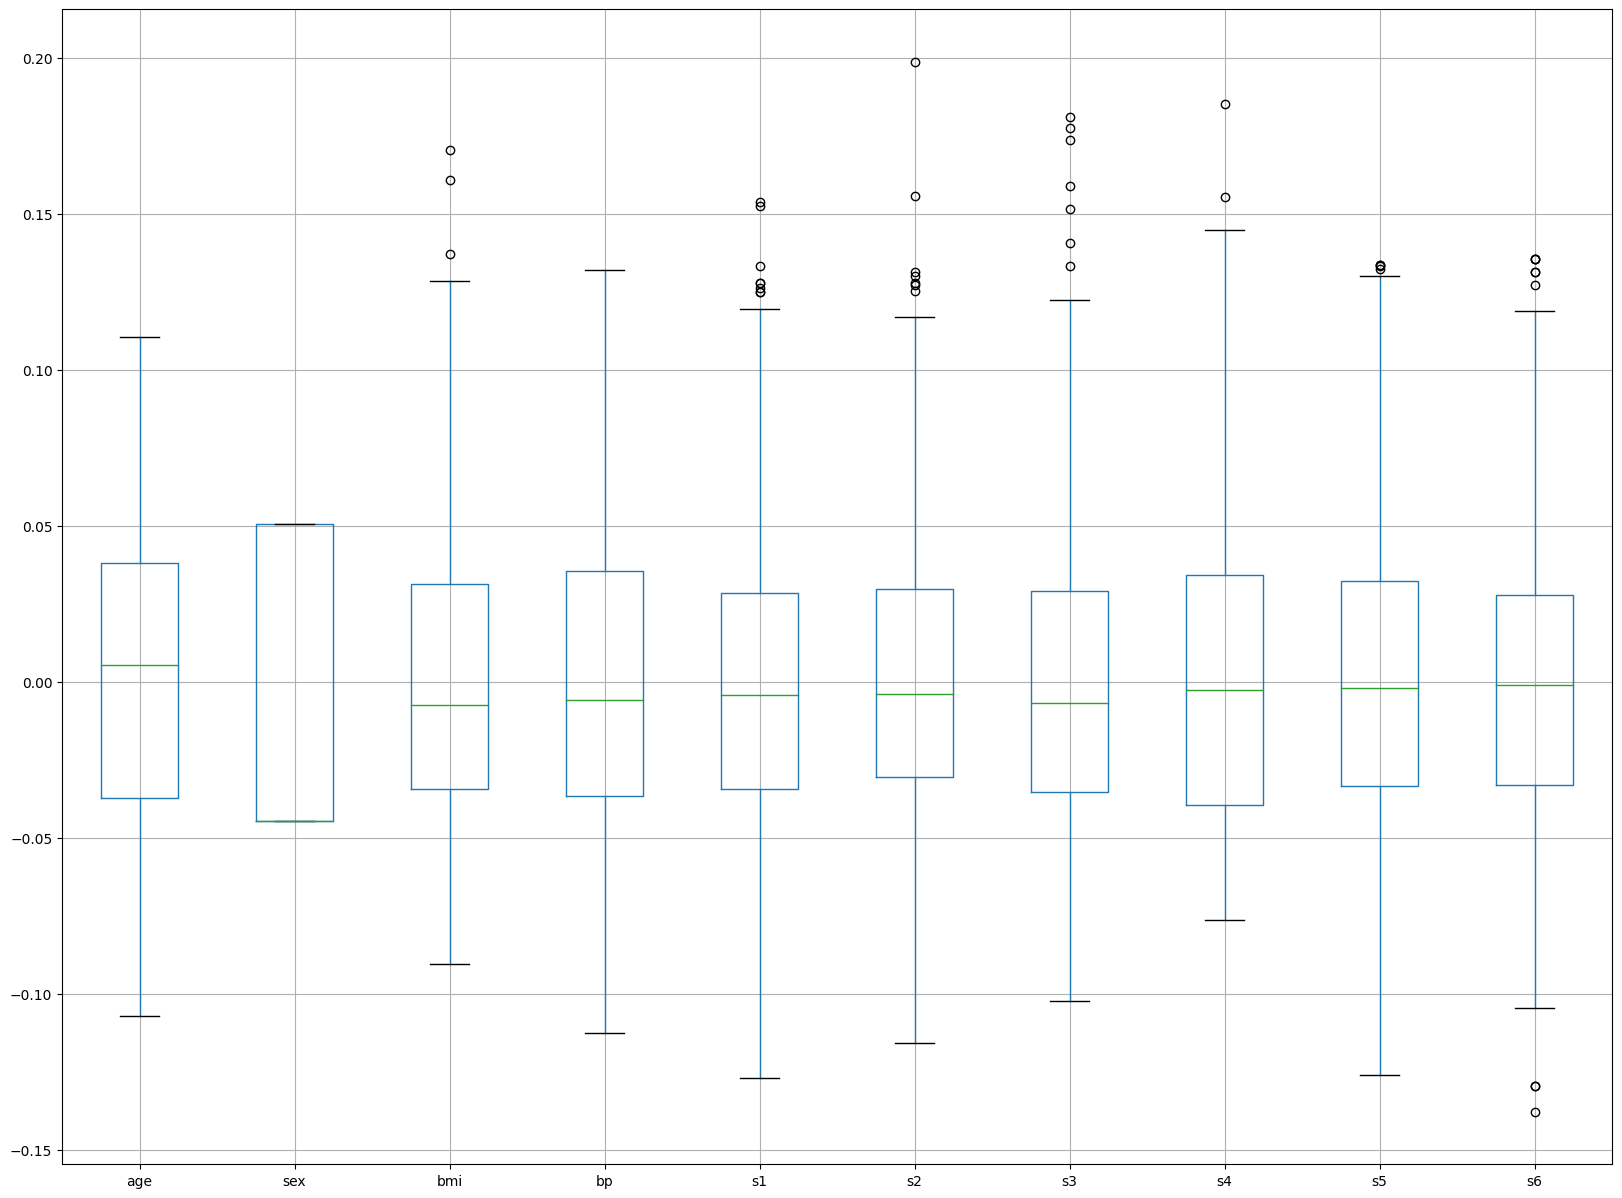

In [7]:
# 2. Produce a histogram and a boxplot of all the features.

import matplotlib.pyplot as plt

# histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

# boxplot

df.boxplot(figsize=(20,15))
plt.show()

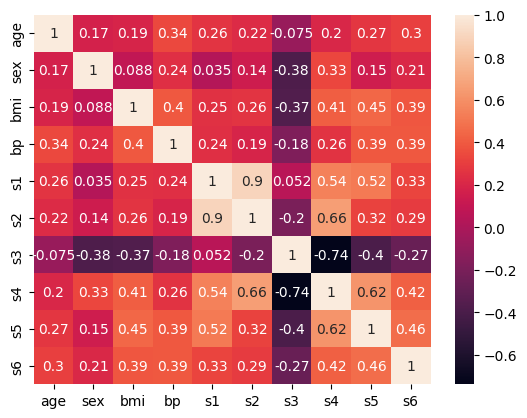

In [8]:
# Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()




Seems like there is a a strong negative correlation between s3 and s4 features, although it's unclear the meaning of the those features, as indicated in the dataset description, we can see that the correlation is -0.738493. Also, there is a strong positive correlation between s1 and s2 features, with a correlation of 0.9.

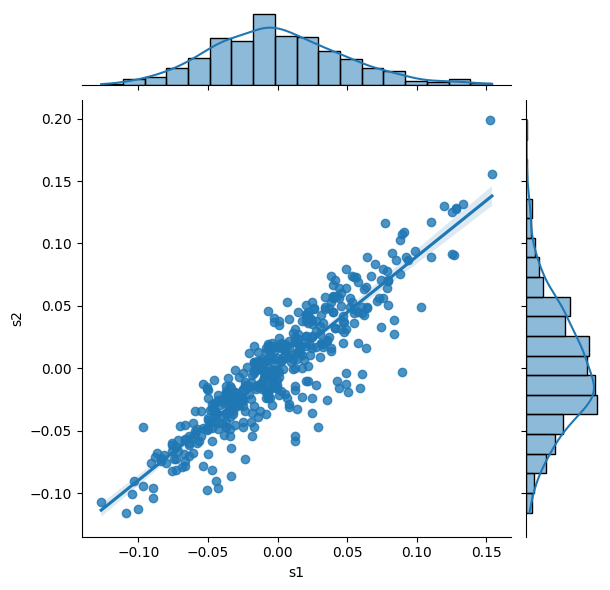

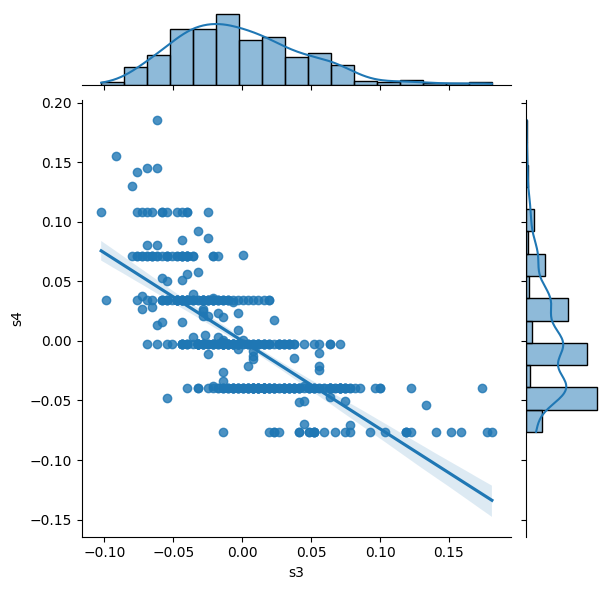

In [10]:
# Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 

# 1. Pair of features with the highest positive correlation
sns.jointplot(x=df['s1'], y=df['s2'], kind='reg')
plt.show()

# 2. Pair of features with the highest negative correlation

sns.jointplot(x=df['s3'], y=df['s4'], kind='reg')
plt.show()



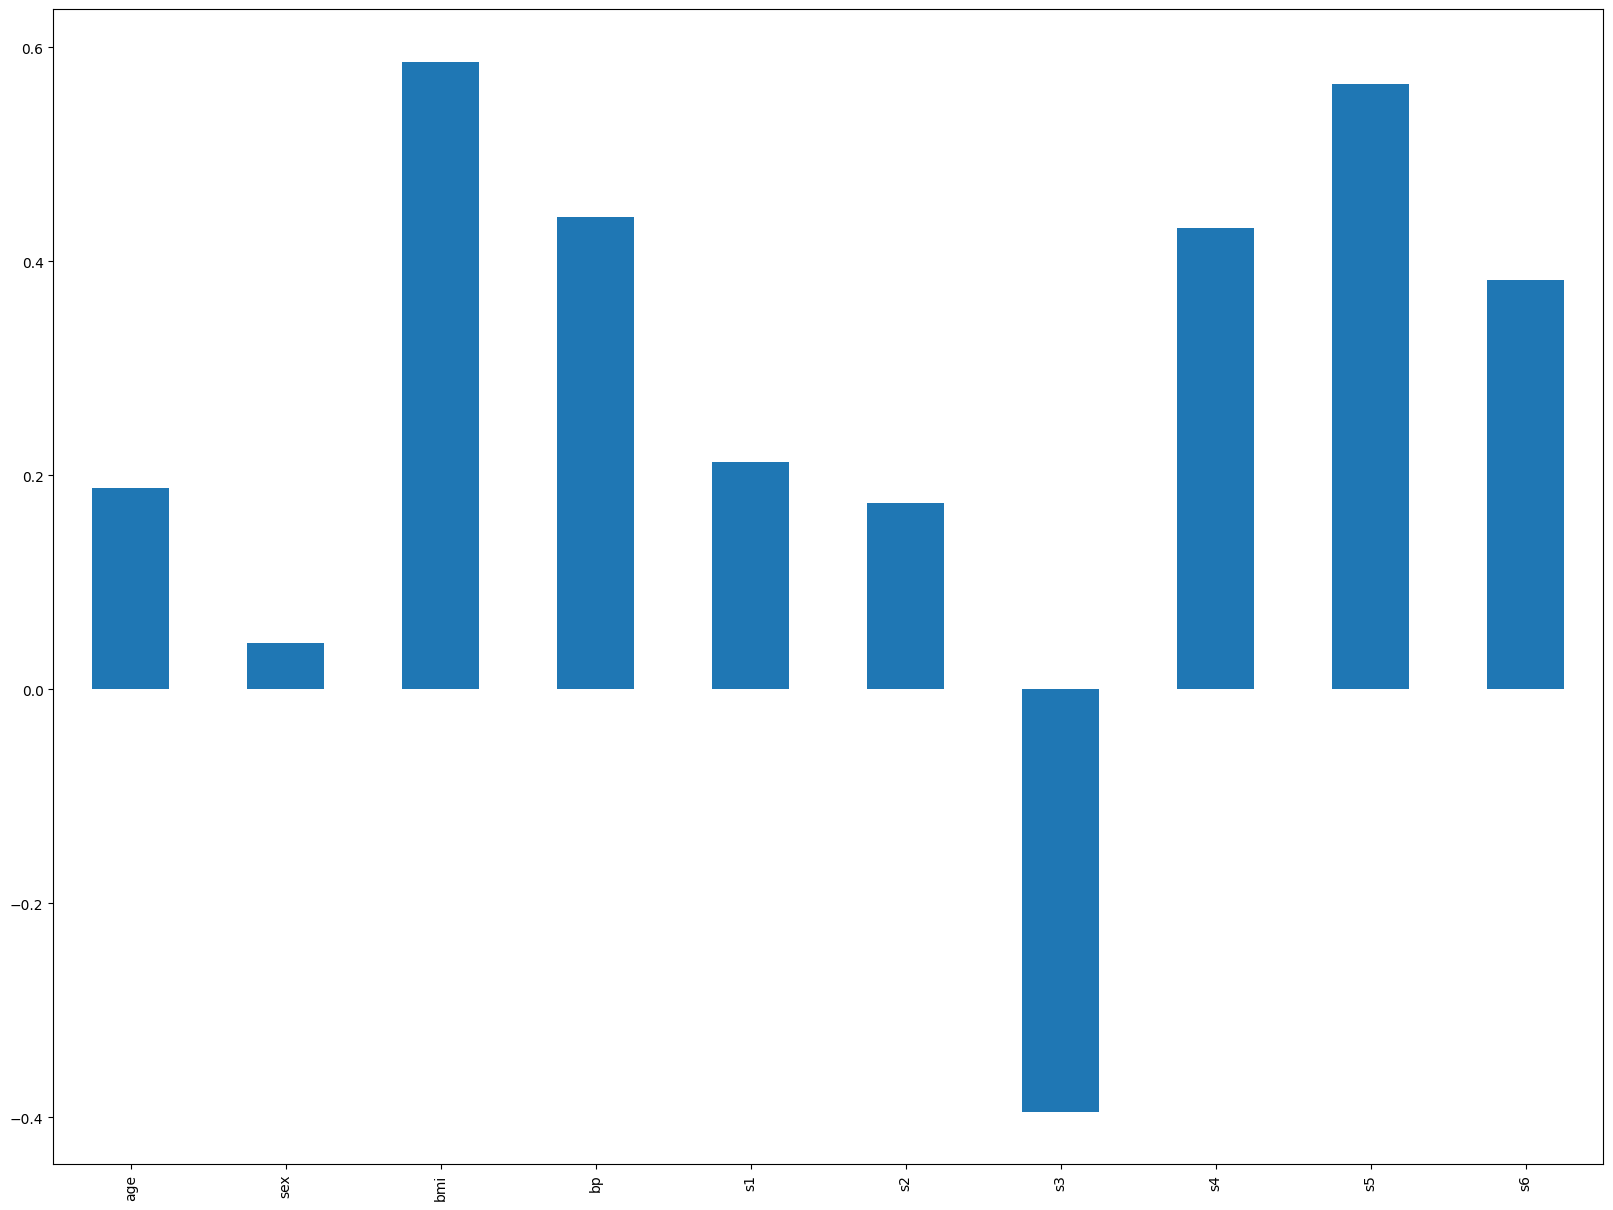

In [12]:
# 5. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.

# Plot the correlation between the target variable and each feature.

correlation_target = df.corrwith(pd.Series(diabetes.target))
correlation_target.plot(kind='bar', figsize=(20,15))
plt.show()



It seems like the biggest indicators to diabetes are bmi and s5, where s3 is the best negative indicator for diabetes.

### Question 3 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 105,000 RCU and a standard deviation of 27,500 RCU.

#### 3.A
What percent of people earn less than 50,000 RCU?

In [10]:

import scipy.stats as stats

mean = 105000
std_dev = 27500

# 1. What percent of people earn less than 50,000 RCU?  


percent = stats.norm.cdf(50000, mean, std_dev)


print(f'{percent*100:.2f}% of people earn less than 50,000 RCU')


2.28% of people earn less than 50,000 RCU


#### 3.B
What percent of people earn between 50,000 RCU and 77,500 RCU?

In [18]:
# find the cdf between 50,000 and 77,500

percent = stats.norm.cdf(77500, mean, std_dev) - stats.norm.cdf(50000, mean, std_dev)
print(f'{percent*100:.2f}% of people earn between 50,000 and 77,500 RCU')

13.59% of people earn between 50,000 and 77,500 RCU


#### 3.C
What percent of people earn more than 115,000 RCU?

In [19]:
# find the cdf of people less than 115,000
percent = stats.norm.cdf(115000, mean, std_dev)

print(f'{(1-percent)*100:.2f}% of people earn more than 115,000 RCU')

35.81% of people earn more than 115,000 RCU


#### 3.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 150,000 RCU?

In [23]:
## First of all, this question is invalid, the it is guaranteed to us that the distribution of the salaries 
## in the factory is the same as distribution of the salaries in the country. If we assume that's the case,
# can calculate the following:

# find the cdf of people less than 150,000
percent = stats.norm.cdf(150000, mean, std_dev)
percent = 1 - percent
employees = percent * 1000
# round down to the nearest integer
employees = int(employees)
print(f'{employees} employees are expected to earn more than 150,000 RCU')


50 employees are expected to earn more than 150,000 RCU


### Question 4 - CLT for Markov chains

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

1. The transition matrix is symmetric around the center, and it is also uniform across the row vectors. The mean of the uniformic distribution is: $E(x) = \frac{b+a}{2}$, therefore we expect the mean of the 30 numbers in a trajectory to be: $E(x) = \frac{6+1}{2} = 3.5$.

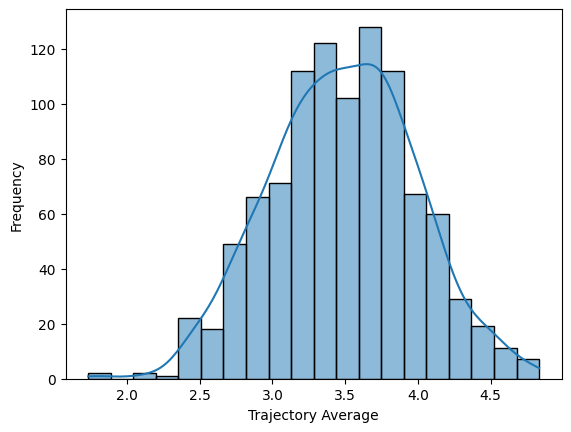

Empirical mean: 3.4847666666666663
Empirical std: 0.49603556212119393
The distribution of the trajectory averages is approximately normal.The empirical mean is close to 3.5, and the empirical standard deviation is close to 0.5. This is expected since the average of the rolls is 3.5, and the standard deviation is 0.5.


In [9]:
## 2 +3

T = np.array([
    [0.4, 0.2, 0.1, 0, 0.1, 0.2],
    [0.2, 0.4, 0.2, 0.1, 0, 0.1],
    [0.1, 0.2, 0.4, 0.2, 0.1, 0],
    [0, 0.1, 0.2, 0.4, 0.2, 0.1],
    [0.1, 0, 0.1, 0.2, 0.4, 0.2],
    [0.2, 0.1, 0, 0.1, 0.2, 0.4]
])

def generate_result(current_state, transition_matrix):
    """Generate the result for the next roll given the current state."""
    return np.random.choice(6, 1, p=transition_matrix[current_state])[0]


def calculate_trajectory_averages(num_rolls, num_trajectories):
    """Calculate the average of the trajectory for a given number of rolls and trajectories."""
    trajectory_averages = []

    for _ in range(num_trajectories):
        # The initial roll is uniformly distributed
        initial_roll = np.random.randint(6)

        # Generate the sequence of rolls
        rolls = [initial_roll]
        for i in range(num_rolls - 1):
            rolls.append(generate_result(rolls[-1], T))

        # Store the average of the trajectory
        trajectory_averages.append(np.mean(np.array(rolls) + 1))

    return trajectory_averages

num_rolls = 30
num_trajectories = 1000
trajectory_averages = calculate_trajectory_averages(num_rolls, num_trajectories)
 
# Plot histogram of the trajectory averages
sns.histplot(trajectory_averages, kde=True, bins=20)
plt.xlabel('Trajectory Average')
plt.ylabel('Frequency')
plt.show()

# Calculate empirical mean and std
emp_mean = np.mean(trajectory_averages)
emp_std = np.std(trajectory_averages)

print('Empirical mean:', emp_mean)
print('Empirical std:', emp_std)

print('The distribution of the trajectory averages is approximately normal.The empirical mean is close to 3.5, and the empirical standard deviation is close to 0.5. This is expected since the average of the rolls is 3.5, and the standard deviation is 0.5.')



##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?
4. Draw normal fit curves on your two histograms.

1. Same as before, we expect the mean of the 500 numbers in a trajectory to be: $E(x) = \frac{6+1}{2} = 3.5$.

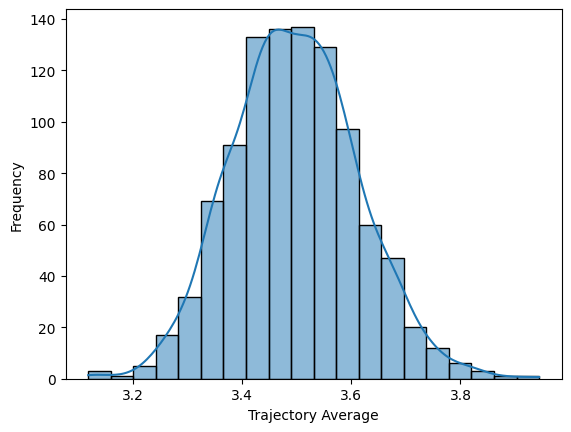

Empirical mean: 3.4969399999999995
Empirical std: 0.11478242199918941


In [31]:
num_rolls = 500
num_trajectories = 1000
trajectory_averages = calculate_trajectory_averages(num_rolls, num_trajectories)
 
# Plot histogram of the trajectory averages
sns.histplot(trajectory_averages, kde=True, bins=20)
plt.xlabel('Trajectory Average')
plt.ylabel('Frequency')
plt.show()

# Calculate empirical mean and std
emp_mean = np.mean(trajectory_averages)
emp_std = np.std(trajectory_averages)

print('Empirical mean:', emp_mean)
print('Empirical std:', emp_std)

#### 4.C
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [18]:
from numpy.linalg import matrix_power
def cov(index, pi_0, states, T):
    X_mean = 0
    Y_mean = 0
    XY_mean = 0
    
    # Each original matrix T in the power of each index 
    T_i = matrix_power(T, index)

    pi_i = pi_0 
    
    # E(X0)
    X_mean  = P0 @ states.T

    # E(Xi)
    Y_mean += pi_i @ states.T

    # E(X_0 * Xi)
    for x in states:
        for y in states:
            XY_mean += x * y * T_i[x - 1, y - 1] * pi_0[x-1]

    return XY_mean - X_mean * Y_mean

states = np.arange(1,7)
P0 = np.ones(6)/6
covariances = np.zeros(500)
for i in range(0,500):
    covariances[i]=cov(i+1, P0, states, T )
    print(f'COV(X_0, X_{i+1}) = {covariances[i]}')

COV(X_0, X_1) = 1.1166666666666654
COV(X_0, X_2) = 0.5166666666666675
COV(X_0, X_3) = 0.25266666666666815
COV(X_0, X_4) = 0.12546666666666795
COV(X_0, X_5) = 0.06258666666666812
COV(X_0, X_6) = 0.03126666666667255
COV(X_0, X_7) = 0.0156282666666705
COV(X_0, X_8) = 0.00781314666667221
COV(X_0, X_9) = 0.00390637866667376
COV(X_0, X_10) = 0.0019531506666758958
COV(X_0, X_11) = 0.0009765676266759726
COV(X_0, X_12) = 0.0004882822746754556
COV(X_0, X_13) = 0.0002441408298743397
COV(X_0, X_14) = 0.00012207035347522321
COV(X_0, X_15) = 6.103516445143953e-05
COV(X_0, X_16) = 3.051757977345915e-05
COV(X_0, X_17) = 1.52587894000078e-05
COV(X_0, X_18) = 7.629394605856987e-06
COV(X_0, X_19) = 3.814697288717639e-06
COV(X_0, X_20) = 1.9073486487997116e-06
COV(X_0, X_21) = 9.536743306171047e-07
COV(X_0, X_22) = 4.768371724139797e-07
COV(X_0, X_23) = 2.3841859508877405e-07
COV(X_0, X_24) = 1.192093055379928e-07
COV(X_0, X_25) = 5.960466076260218e-08
COV(X_0, X_26) = 2.980233837490687e-08
COV(X_0, X_27)

### Question 5 - Distributions

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

### 1. 
$P(R = 0)$ is the probability that all $n$ sampled observations exceed $q$. If each observation is independent and identically distributed like $X$, then $P(R = 0) = P(X > q)^n = (1 - 0.8)^n = 0.2^n$.

### 2.

The distribution of $R$ is a Binomial distribution. Since every attempt at drawing an observation is an independent trial, and each has a probability of $0.8$ of being less than or equal to $q$ (and $0.2$ of exceeding $q$), the total count of successful trials (defined as observations less than or equal to $q$) follows a Binomial distribution. So, $R \sim Bin(n, 0.8)$.

In [22]:
### 3.

from scipy.stats import binom

def find_lambda(n, p=0.8, q=0.9):
    for k in range(2, n+1):
        if (1 - binom.cdf(k-1, n, p) >= q) and (1 - binom.cdf(k, n, p) < q):
            return k
    return None

n = 100
p = 0.8
q = 0.9
lambda_ = find_lambda(n, p, q)
print(f'For n={n}, p={p}, and q={q}, the smallest value of k is {lambda_}')

For n=100, p=0.8, and q=0.9, the smallest value of k is 75


In [23]:
## 4.
import numpy as np

lam_n = find_lambda(n=100)
count = 0
for _ in range(200):
    sample = np.random.uniform(0, 1, 100)
    sample_sorted = np.sort(sample)
    if sample_sorted[lam_n] <= 0.8:
        count += 1

print(f"In 200 trials, a_lambda(n) was less than or equal to 0.8 in {count} cases.")



In 200 trials, a_lambda(n) was less than or equal to 0.8 in 176 cases.
